In [1]:
!pip install ultralytics

In [2]:
!nvidia-smi

Wed Jan  1 16:37:40 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!yolo predict model=yolo11n.pt source='/content/bus.jpg'

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

WARNING ⚠️ NMS time limit 2.050s exceeded
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 74.4ms
Speed: 8.7ms preprocess, 74.4ms inference, 2400.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/yolov11

/content/drive/MyDrive/yolov11


In [7]:
!ls

morefood.v3i.yolov11  runs  yolo11n.pt	Yolov11.ipynb


In [8]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
print(torch.cuda.device_count())  # Number of GPUs

True
1


In [9]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [12]:
model = YOLO('yolo11n.pt')

train_results = model.train(
    data="/content/drive/MyDrive/yolov11/morefood.v3i.yolov11/data.yaml",  # path to dataset YAML
    epochs=15,  # number of training epochs
    imgsz=640,  # training image size
    device="cuda",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/yolov11/morefood.v3i.yolov11/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/train/labels.cache... 134 images, 0 backgrounds, 0 corrupt: 100%|██████████| 134/134 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      2.85G     0.9506       3.77      1.002         58        640: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all         31        209       0.04      0.173     0.0462     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      2.41G     0.8736      3.127     0.9489         70        640: 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         31        209      0.102      0.607      0.292      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      2.49G     0.9488      2.475      0.969         50        640: 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         31        209     0.0545      0.713      0.307       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15       2.5G     0.9115      1.973     0.9651         59        640: 100%|██████████| 9/9 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         31        209     0.0515      0.816      0.444      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      2.43G     0.9383      1.611     0.9797         52        640: 100%|██████████| 9/9 [00:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         31        209     0.0535      0.798       0.54      0.401


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      2.45G      0.815      1.271     0.9541         46        640: 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         31        209     0.0348      0.584      0.296      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15       2.4G     0.7984      1.194     0.9611         49        640: 100%|██████████| 9/9 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         31        209      0.769      0.229      0.496       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15       2.4G     0.7958      1.105     0.9637         46        640: 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         31        209      0.965      0.173      0.695      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15       2.4G     0.7813      1.048     0.9373         29        640: 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         31        209      0.949      0.232      0.818      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      2.41G     0.7623     0.9486     0.9456         37        640: 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         31        209      0.931      0.428      0.899      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15       2.4G     0.7382     0.9263     0.9325         32        640: 100%|██████████| 9/9 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         31        209       0.94      0.559      0.943      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      2.42G     0.7619      0.944     0.9315         52        640: 100%|██████████| 9/9 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]

                   all         31        209      0.869      0.852      0.942      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15       2.4G     0.7283     0.8817     0.9167         33        640: 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         31        209      0.896      0.933      0.965      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      2.42G     0.7049     0.8638     0.9032         31        640: 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         31        209      0.954      0.938      0.971      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      2.42G     0.7002      0.879     0.9208         27        640: 100%|██████████| 9/9 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         31        209      0.955       0.94      0.975      0.784



15 epochs completed in 0.020 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


                   all         31        209      0.955       0.94      0.975      0.784
                  meat         19         29      0.958      0.782      0.939      0.618
                  milk         20         33      0.904      0.939      0.952      0.786
                 onion         23         53      0.989          1      0.995      0.796
                tomato         24         55          1       0.98      0.995      0.879
              zucchini         19         39      0.924          1      0.995      0.843
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train2


In [30]:
metrics = model.val()

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]


                   all         31        209      0.955       0.94      0.975      0.784
                  meat         19         29      0.958      0.782      0.939      0.619
                  milk         20         33      0.903      0.939      0.953      0.782
                 onion         23         53      0.989          1      0.995      0.798
                tomato         24         55          1      0.979      0.995      0.878
              zucchini         19         39      0.924          1      0.995       0.84
Speed: 0.3ms preprocess, 24.9ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/val


In [22]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [23]:
!ls runs/detect/train2/

args.yaml					     P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			     PR_curve.png      train_batch45.jpg
confusion_matrix.png				     R_curve.png       train_batch46.jpg
events.out.tfevents.1735749531.1aa716febef5.43928.2  results.csv       train_batch47.jpg
F1_curve.png					     results.png       val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					     train_batch1.jpg  weights


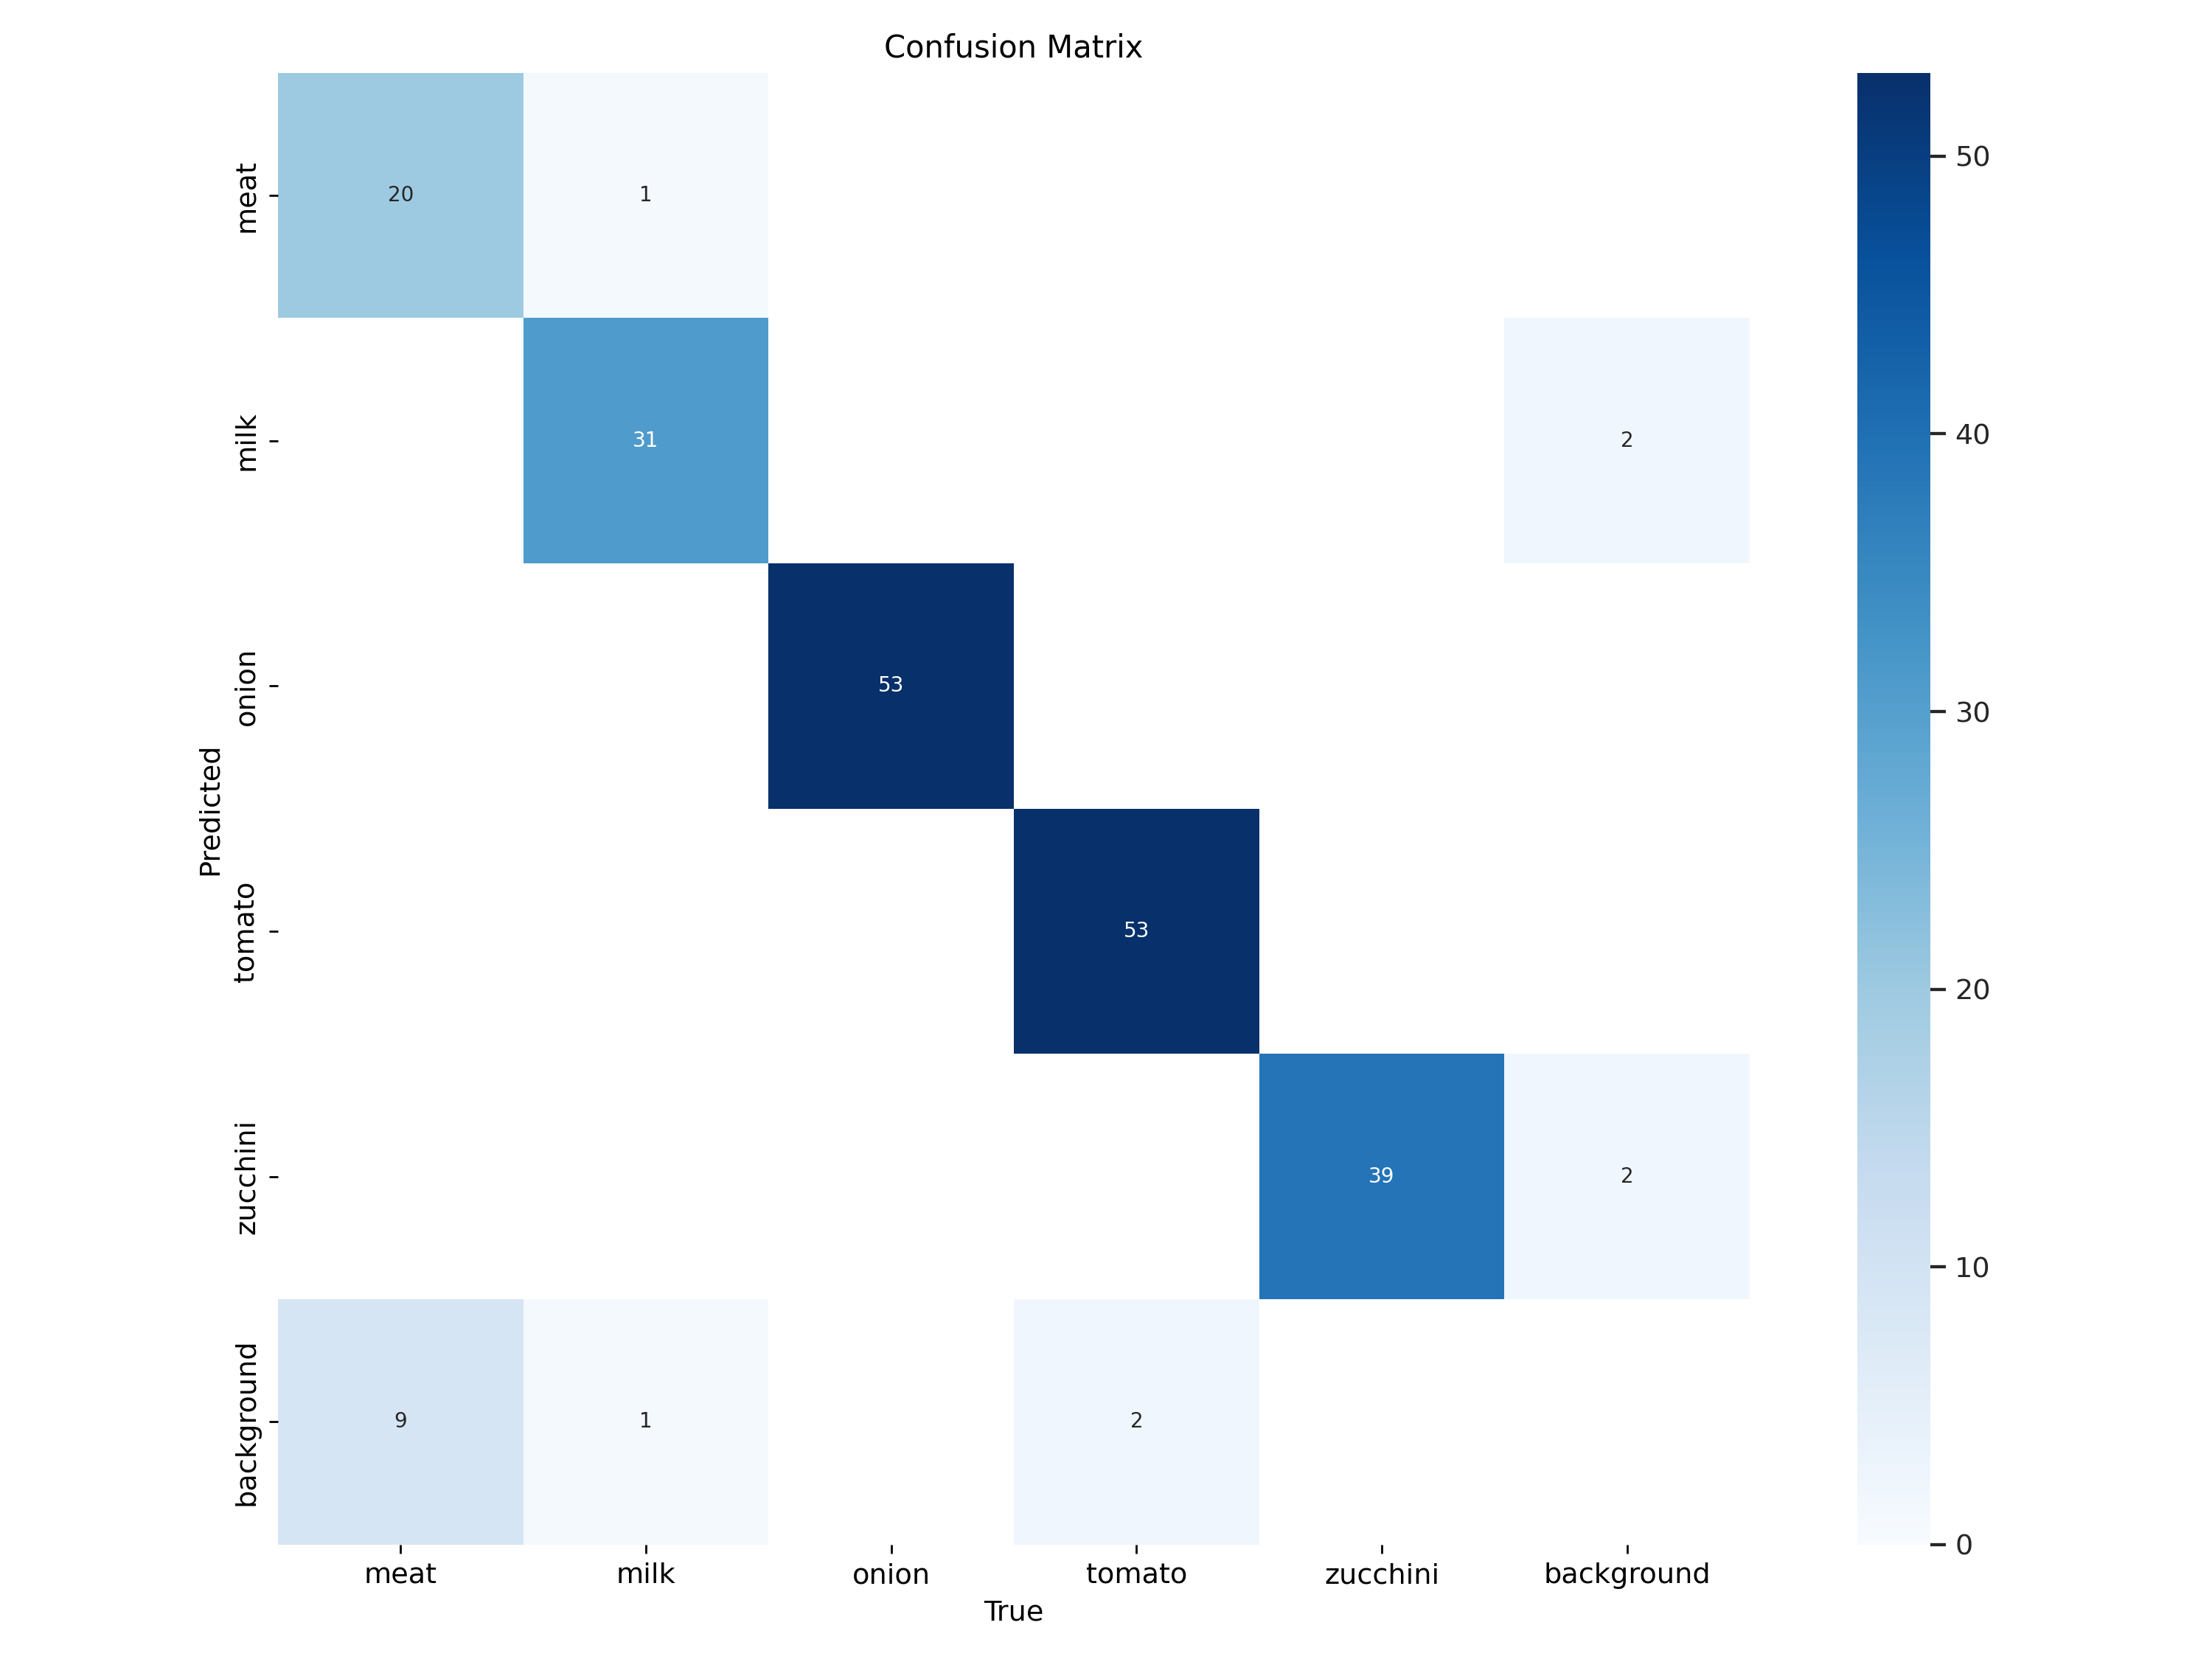

In [24]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

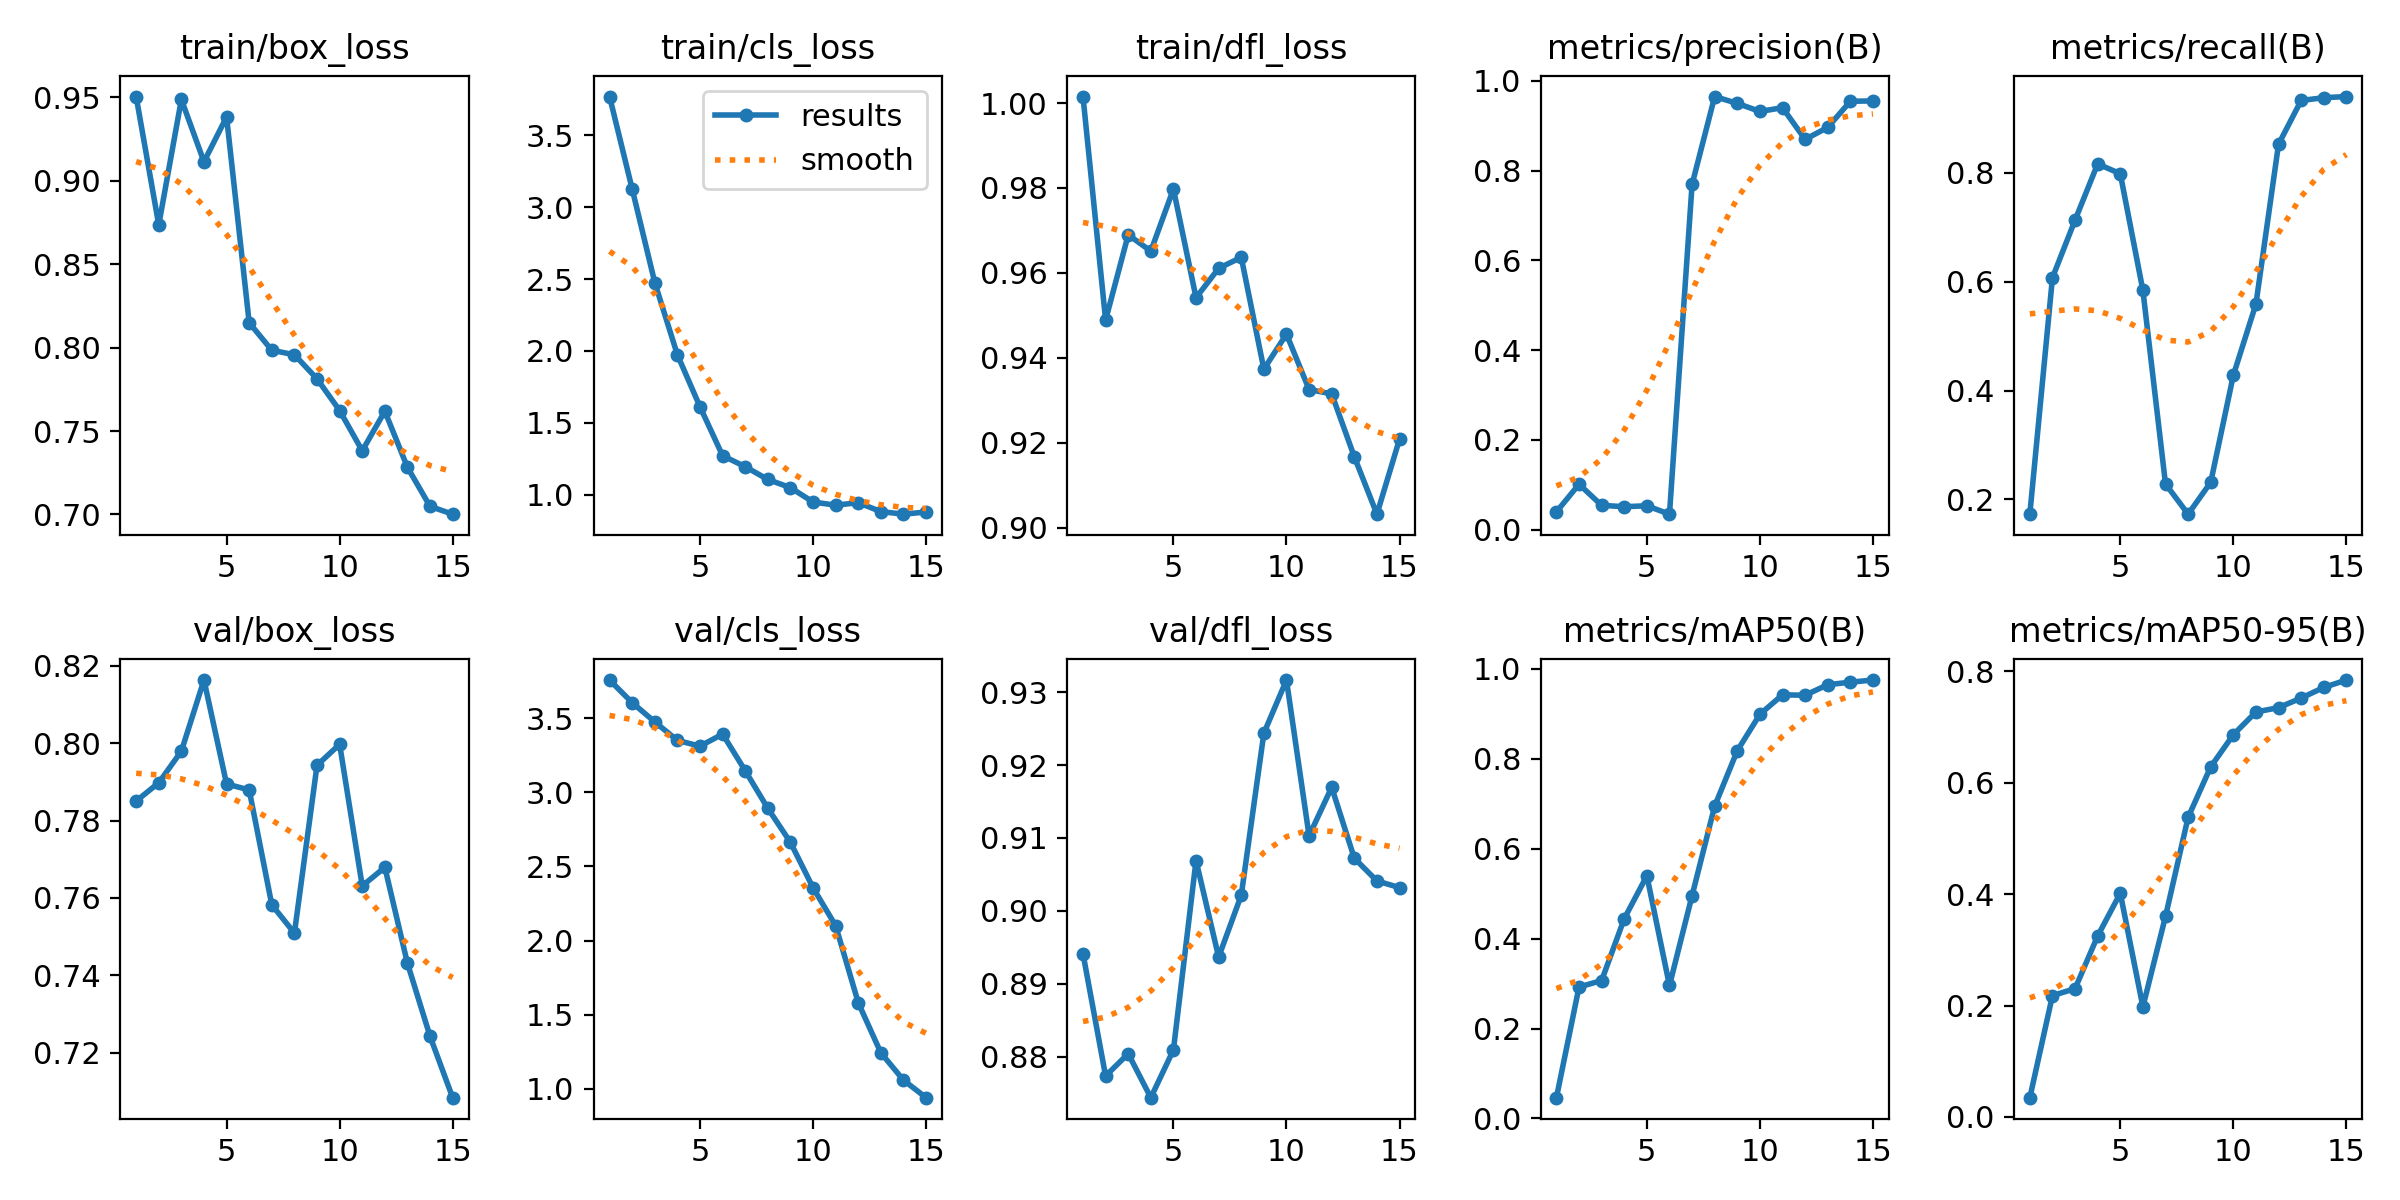

In [25]:
Image(filename='runs/detect/train2/results.png', width=600)

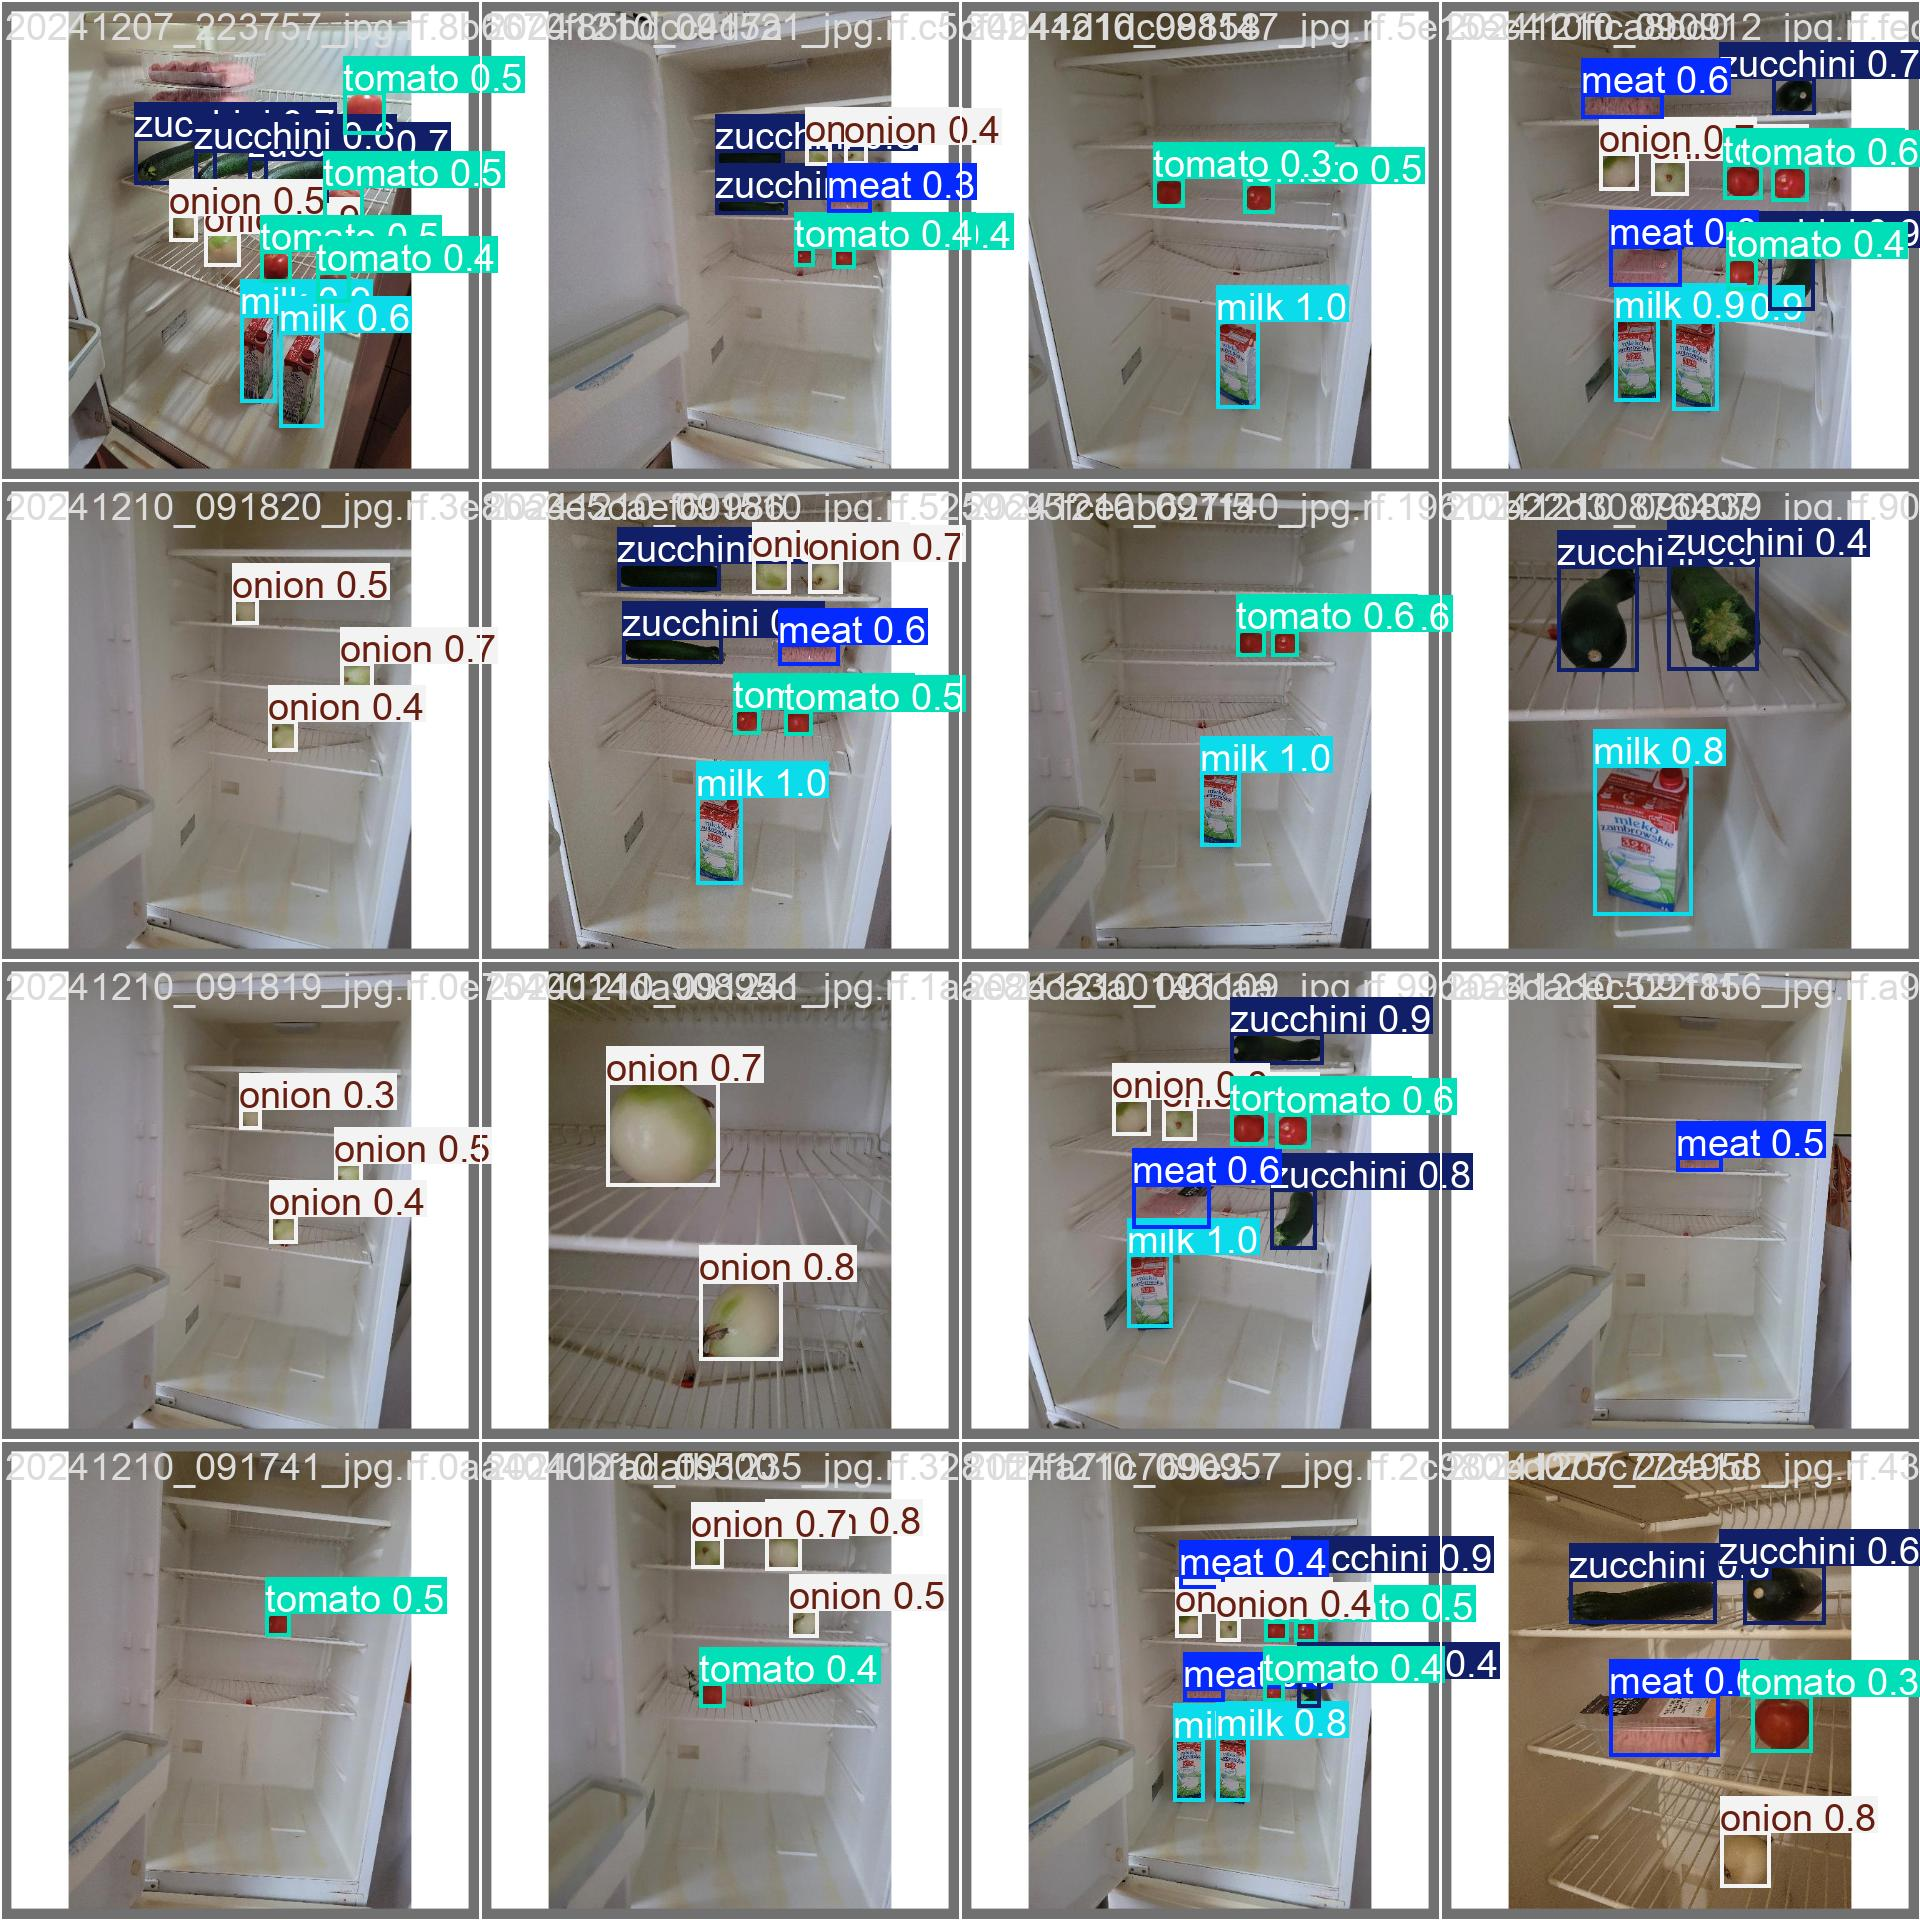

In [27]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

In [40]:
model = YOLO('/content/drive/MyDrive/yolov11/runs/detect/train2/weights/best.pt')

train_results = model.val(
    data="/content/drive/MyDrive/yolov11/morefood.v3i.yolov11/data.yaml",  # path to dataset YAML
    imgsz=640,  # training image size
    device="cuda",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]


                   all         31        209      0.955       0.94      0.975      0.784
                  meat         19         29      0.958      0.782      0.939      0.619
                  milk         20         33      0.903      0.939      0.953      0.782
                 onion         23         53      0.989          1      0.995      0.798
                tomato         24         55          1      0.979      0.995      0.878
              zucchini         19         39      0.924          1      0.995       0.84
Speed: 0.4ms preprocess, 5.5ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/val3



image 1/13 /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/test/images/20241207_224112_jpg.rf.88f5b6d0b1dfbafda3f9e8fde996457e.jpg: 640x640 1 meat, 2 milks, 2 onions, 3 tomatos, 2 zucchinis, 11.1ms
image 2/13 /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/test/images/20241207_224258_jpg.rf.7bc99f917edef588304ef94a464785a1.jpg: 640x640 1 meat, 2 milks, 3 onions, 1 zucchini, 13.7ms
image 3/13 /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/test/images/20241207_224327_jpg.rf.fa27b9c9ea04136643707653b0584578.jpg: 640x640 1 milk, 3 onions, 2 tomatos, 2 zucchinis, 8.2ms
image 4/13 /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/test/images/20241207_224535_jpg.rf.7e175464245bc7be633cf072947460c3.jpg: 640x640 2 meats, 2 milks, 3 tomatos, 9.1ms
image 5/13 /content/drive/MyDrive/yolov11/morefood.v3i.yolov11/test/images/20241207_224926_jpg.rf.f593125523e64095a11841cec70cbcfa.jpg: 640x640 1 milk, 1 onion, 1 tomato, 3 zucchinis, 8.6ms
image 6/13 /content/drive/MyDrive/yolov11/more

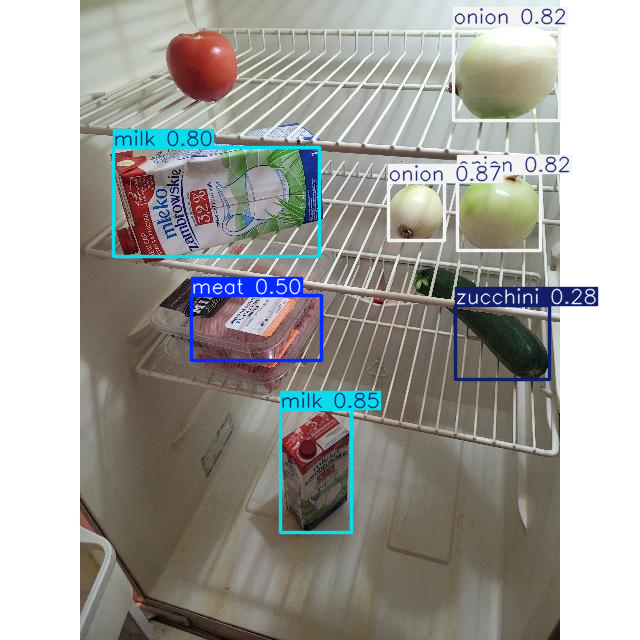

In [47]:
model = YOLO('/content/drive/MyDrive/yolov11/runs/detect/train2/weights/best.pt')
results= model("/content/drive/MyDrive/yolov11/morefood.v3i.yolov11/test/images")
results[1].show()